In [ ]:
import os

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir("/content/drive/My Drive/SEM-7-Documents/Final-Year-Project/DataSet")

['kaggle.json', 'sample_submission.csv', 'test.csv', 'train.csv']

In [ ]:
train_df = pd.read_csv("/content/drive/My Drive/SEM-7-Documents/Final-Year-Project/DataSet/train.csv")
test_df = pd.read_csv("/content/drive/My Drive/SEM-7-Documents/Final-Year-Project/DataSet/test.csv")
sample_df = pd.read_csv("/content/drive/My Drive/SEM-7-Documents/Final-Year-Project/DataSet/sample_submission.csv")

In [ ]:
train_df["class"] = train_df["target"].map({0:"Not Disaster", 1:"Disaster"})
train_df.sample(10)

,id,keyword,location,text,target,class
7568,10818,wrecked,NaN,The Riddler would be the best early-exit prima...,0,Not Disaster
6625,9489,terrorism,NaN,Online Homeland security: An Appraisal of #Pak...,0,Not Disaster
2718,3904,devastated,NaN,@UN No more #GujaratRiot &amp; #MumbaiRiot92-9...,1,Disaster
1378,1987,bush%20fires,London/Bristol/Guildford,On holiday to relax sunbathe and drink ... Put...,0,Not Disaster
3019,4334,dust%20storm,The Harbinger.,@LegacyOfTheSith @SagaciousSaber @Lordofbetray...,0,Not Disaster
4378,6219,hijacker,California,Governor weighs parole for California school b...,1,Disaster
3336,4778,evacuated,Manchester UK,Trafford Centre film fans angry after Odeon ci...,1,Disaster
3634,5183,fatalities,jersey,mortal kombat fatalities are so gross but inte...,0,Not Disaster
4932,7026,mayhem,"Pueblo, Colorado",The Campaign: Will Ferrell and Zach Galifianak...,0,Not Disaster
1394,2012,casualties,NaN,Another movie theater attack..close to home th...,1,Disaster


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   class     7613 non-null   object
dtypes: int64(2), object(4)
memory usage: 357.0+ KB


In [ ]:
print(train_df.shape,test_df.shape)

(7613, 6) (3263, 4)


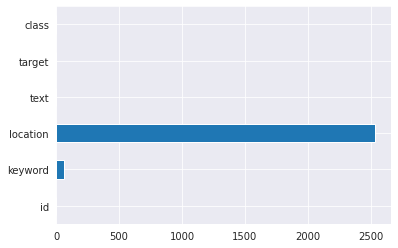

In [ ]:
train_df.isnull().sum().plot(kind = "barh");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



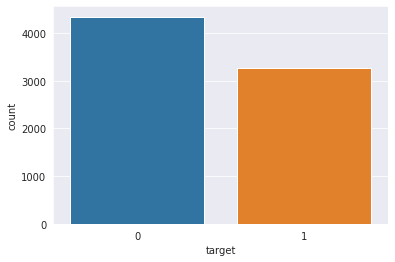

In [ ]:
sns.countplot(train_df['target'])

In [ ]:
targets = train_df["target"].value_counts()

fig = px.pie(values = targets,names = ["Not a Disaster","Disaster"], width=530,height=500,
             title= "Distribution of tweets",hover_name=["Not a Disaster","Disaster"],
            )
fig.show()

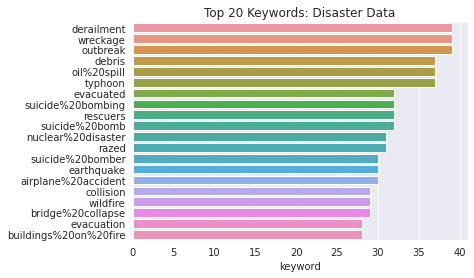

In [ ]:
disaster_kw=train_df['keyword'][train_df.target==1]
disaster_kw=disaster_kw.value_counts()[0:20]
sns.barplot(y=disaster_kw.index,x=disaster_kw,orient='h')
plt.title('Top 20 Keywords: Disaster Data')
plt.show()

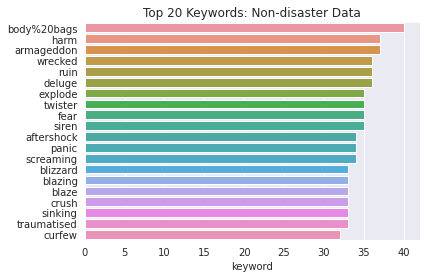

In [ ]:
regular_kw=train_df['keyword'][train_df.target==0]
regular_kw=regular_kw.value_counts()[0:20]
sns.barplot(y=regular_kw.index,x=regular_kw,orient='h')
plt.title('Top 20 Keywords: Non-disaster Data')
plt.show()

In [ ]:
train_df["length"] = train_df.text.str.split().apply(len)
train_df.sample(10)

,id,keyword,location,text,target,class,length
1512,2183,catastrophic,Bouvet Island,@APANO55 @JamesMelville 99% of Scientists don...,1,Disaster,16
2635,3778,destruction,Yooooooo,What's happening? A destruction indeed http://...,0,Not Disaster,6
1669,2412,collide,Greg's place,Stepped outside with a drink and a cigarette a...,0,Not Disaster,19
4203,5966,hazard,Dil's Campsite,@Dead_Dreamer15 ...because if it were on fire ...,1,Disaster,12
112,162,aftershock,NaN,Aftershock was the most terrifying best roller...,0,Not Disaster,18
3813,5417,first%20responders,WorldWide,Loved the way this book was written to include...,0,Not Disaster,19
6942,9955,trouble,"Washington, DC",Trouble with mental fog? Consider these tests:...,0,Not Disaster,8
5837,8341,rubble,"ATLANTA , GEORGIA",#360WiseNews : China's Stock Market Crash: Are...,0,Not Disaster,13
70,100,accident,UK,http://t.co/GKYe6gjTk5 Had a #personalinjury a...,0,Not Disaster,18
3753,5332,fire,"St.Cloud, MN",Dear @CanonUSAimaging I brought it ;) #CanonBr...,0,Not Disaster,12


In [ ]:
fig = px.histogram(train_df, x = "keyword", y = "length",
                   color = "class", opacity=0.8, title="Lenght of Tweets According to Keywords")
fig.show()

In [ ]:
d_locations =  train_df[train_df["class"]=="Disaster"].location.value_counts()
nd_locations =  train_df[train_df["class"]=="Not Disaster"].location.value_counts()

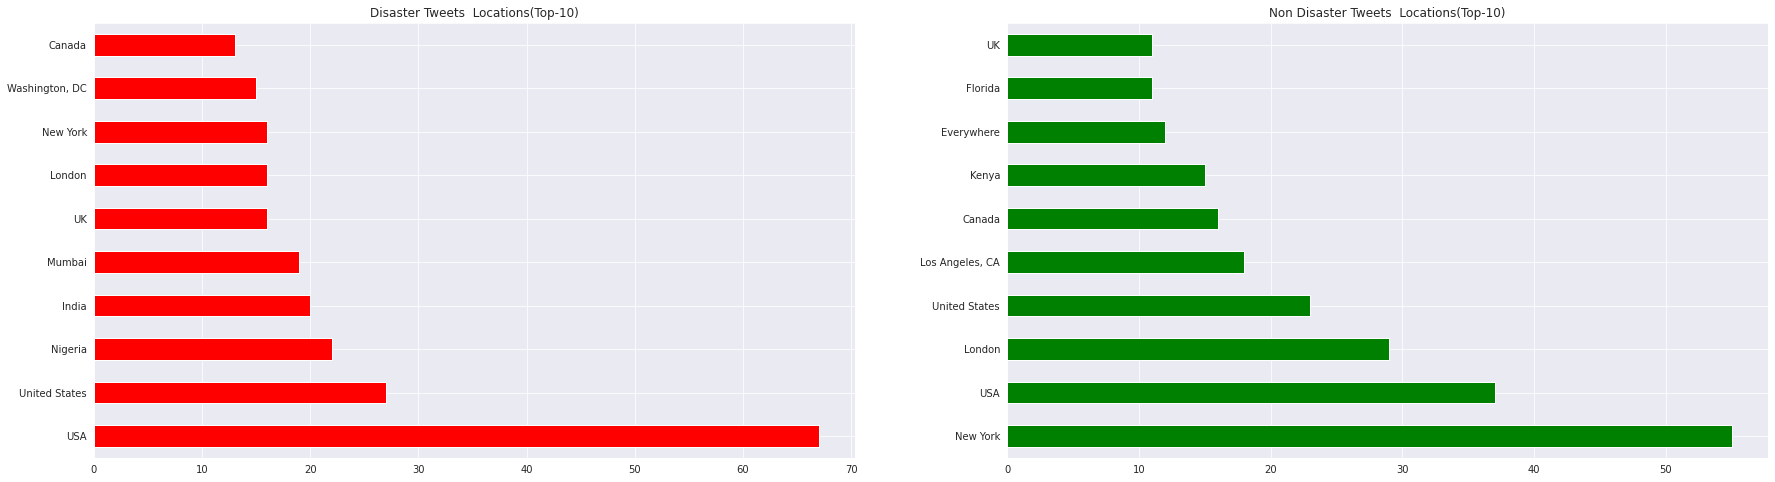

In [ ]:
plt.figure(figsize = [30,8])

plt.subplot(121)
d_locations[:10].plot(kind = "barh", color = "Red")
plt.title("Disaster Tweets  Locations(Top-10)")

plt.subplot(122)
nd_locations[:10].plot(kind = "barh", color = "Green")
plt.title("Non Disaster Tweets  Locations(Top-10)");

In [ ]:
df_train = train_df[["text","target","class"]]

In [ ]:
df_train.text[:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [ ]:
test_df.text[:5]

0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object

In [ ]:
import re
import string

In [ ]:
def processTextR1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: processTextR1(x)

In [ ]:
df_train["clean_text"] = df_train["text"].apply(round1)
test_df["clean_text"] = test_df["text"].apply(round1)

In [ ]:
df_train.clean_text[10]

'three people died from the heat wave so far'

In [ ]:
test_df.clean_text[1]

'heard about earthquake is different cities stay safe everyone'

In [ ]:
punctuation=string.punctuation
print(type(punctuation), punctuation)
mapping=str.maketrans("","",punctuation)
print(type(mapping), mapping)
print(df_train["clean_text"].head(10))
df_train["clean_text"]=df_train["clean_text"].str.translate(mapping)
print(df_train["clean_text"].head(10))

<class 'str'> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
<class 'dict'> {33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}
0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
5    rockyfire update  california hwy  closed in bo...
6    flood disaster heavy rain causes flash floodin...
7    im on top of the hill and i can see a fire in ...
8    theres an emergency evacuation happening now i...
9     im afraid that the tornado is coming to our area
Name: clean_text, dtype: object
0    our deeds are the reason o

In [ ]:
import nltk
nltk.download("stopwords")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.corpus import stopwords
print(type(stopwords.words()), len(stopwords.words()))
print(type(stopwords.words('english')), len(stopwords.words('english'))) #list, 179 stopwords
print(stopwords.words('english'))
stopwords_eng=stopwords.words('english')

<class 'list'> 7702
<class 'list'> 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',

In [ ]:
stop_words = stopwords.words("english")

In [ ]:
print(df_train["clean_text"].head(10))
def remove_stopwords(in_str):
    new_str=''
    words=in_str.split() #string is splitted through white space in a list of words
    for tx in words:
        if tx not in stopwords_eng:
            new_str=new_str + tx + " "
    return new_str
df_train["lowered_text_stop_removed"]=df_train["clean_text"].apply(lambda x: remove_stopwords(x))
print(df_train["lowered_text_stop_removed"].head(10))

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
5    rockyfire update  california hwy  closed in bo...
6    flood disaster heavy rain causes flash floodin...
7    im on top of the hill and i can see a fire in ...
8    theres an emergency evacuation happening now i...
9     im afraid that the tornado is coming to our area
Name: clean_text, dtype: object
0        deeds reason earthquake may allah forgive us 
1               forest fire near la ronge sask canada 
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
5    rockyfire update california hwy closed directi...
6    flood disaster heavy rain causes flash floodin...
7                          im top

In [ ]:
from collections import Counter
counter=Counter()
for text in df_train["lowered_text_stop_removed"] :
    for word in text.split():
        counter[word]+=1
print(type(counter))
most_cmn_list=counter.most_common(10)
print(type(most_cmn_list), most_cmn_list)
most_cmn_words_list=[]

for word, freq in most_cmn_list:
    most_cmn_words_list.append(word)

print(most_cmn_words_list)

<class 'collections.Counter'>
<class 'list'> [('like', 345), ('im', 298), ('amp', 298), ('fire', 250), ('get', 229), ('new', 223), ('via', 220), ('people', 196), ('one', 193), ('news', 192)]
['like', 'im', 'amp', 'fire', 'get', 'new', 'via', 'people', 'one', 'news']


In [ ]:
print(df_train["lowered_text_stop_removed"].head(10))
def remove_frequent(in_str):
    new_str=''
    for word in in_str.split():
        if word not in most_cmn_words_list:
            new_str=new_str + word + " "
    return new_str
df_train["lowered_text_stop_removed_freq_removed"]=df_train["lowered_text_stop_removed"].apply(lambda x: remove_frequent(x))
print(df_train["lowered_text_stop_removed_freq_removed"].head(10))

0        deeds reason earthquake may allah forgive us 
1               forest fire near la ronge sask canada 
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
5    rockyfire update california hwy closed directi...
6    flood disaster heavy rain causes flash floodin...
7                          im top hill see fire woods 
8    theres emergency evacuation happening building...
9                       im afraid tornado coming area 
Name: lowered_text_stop_removed, dtype: object
0        deeds reason earthquake may allah forgive us 
1                    forest near la ronge sask canada 
2    residents asked shelter place notified officer...
3      receive wildfires evacuation orders california 
4    got sent photo ruby alaska smoke wildfires pou...
5    rockyfire update california hwy closed directi...
6    flood disaster heavy rain causes flash floodin...
7                 

In [ ]:
most_rare_list=counter.most_common()[-10:]
most_rare_words=[]
for word, freq in most_rare_list:
    most_rare_words.append(word)

print(most_rare_words)

['dei', 'explosivespacked', 'tnwx', 'httptcofwqfckncqw', 'fatherofthree', 'overtaking', 'bathandnortheastsomerset', 'forney', 'developing', 'symptoms']


In [ ]:
def remove_rare(in_text):
    new_text=""
    for word in in_text.split():
        if word not in most_rare_words:
            new_text=new_text + word + " "
    return new_text
df_train["lowered_stop_freq_rare_removed"]=df_train["lowered_text_stop_removed_freq_removed"].apply(lambda x: remove_rare(x))
print(df_train["lowered_stop_freq_rare_removed"].head(10))

0        deeds reason earthquake may allah forgive us 
1                    forest near la ronge sask canada 
2    residents asked shelter place notified officer...
3      receive wildfires evacuation orders california 
4    got sent photo ruby alaska smoke wildfires pou...
5    rockyfire update california hwy closed directi...
6    flood disaster heavy rain causes flash floodin...
7                                  top hill see woods 
8    theres emergency evacuation happening building...
9                          afraid tornado coming area 
Name: lowered_stop_freq_rare_removed, dtype: object


In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer("english")

In [ ]:
def processTextR2(text, stem = False):
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"," ",str(text).lower().strip())
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

round2 = lambda x: processTextR2(x)

In [ ]:
df_train["clean_text"] = df_train["clean_text"].apply(round2)
test_df["clean_text"] = test_df["clean_text"].apply(round2)

In [ ]:
from wordcloud import WordCloud,STOPWORDS

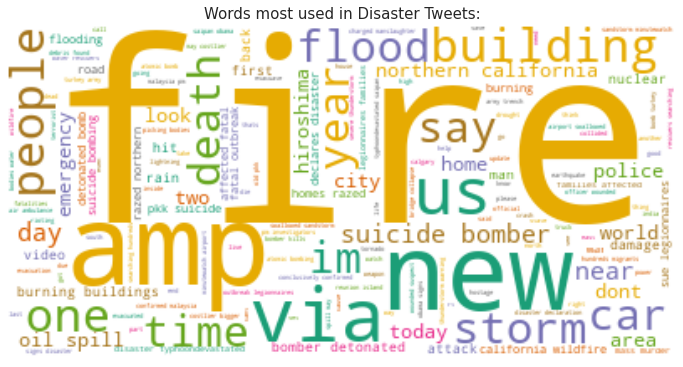

In [ ]:


plt.figure(figsize=(12,10))

wc = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate("".join(df_train[df_train["class"]=="Disaster"].clean_text))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.title("Words most used in Disaster Tweets:",fontsize=15)
plt.show()


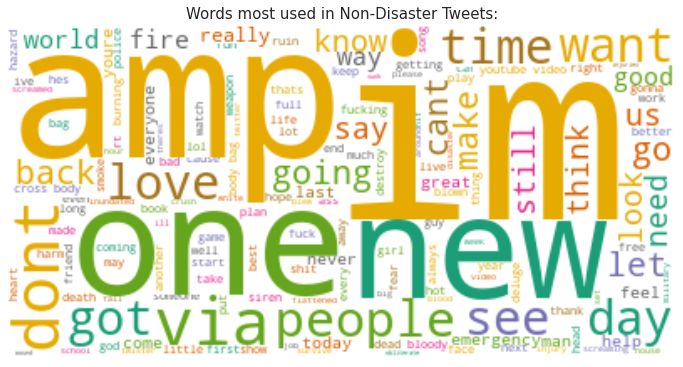

In [ ]:

plt.figure(figsize=(12,10))

wc = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate("".join(df_train[df_train["class"]=="Not Disaster"].clean_text))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.title("Words most used in Non-Disaster Tweets:",fontsize=15)
plt.show()

In [ ]:
pip install matplotlib-venn

In [ ]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib import pyplot as plt
%matplotlib inline


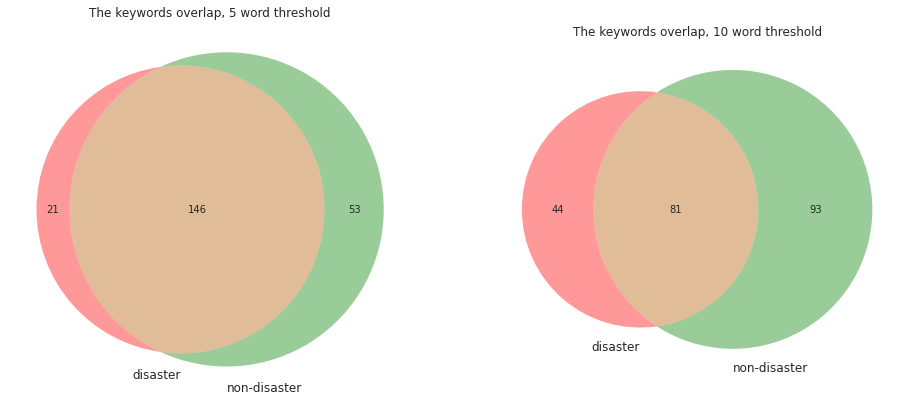

In [ ]:
disaster_kw=train_df['keyword'][train_df.target==1]
disaster_kw=disaster_kw.value_counts()
regular_kw=train_df['keyword'][train_df.target==0]
regular_kw=regular_kw.value_counts()

th=5
disaster_kw2=disaster_kw.index[disaster_kw>th]
regular_kw2=regular_kw.index[regular_kw>th]
intersection=np.intersect1d(disaster_kw2,regular_kw2)
n_th5=(len(disaster_kw2)-len(intersection),len(regular_kw2)-len(intersection),len(intersection))
th=10
disaster_kw2=disaster_kw.index[disaster_kw>th]
regular_kw2=regular_kw.index[regular_kw>th]
intersection=np.intersect1d(disaster_kw2,regular_kw2)
n_th10=(len(disaster_kw2)-len(intersection),len(regular_kw2)-len(intersection),len(intersection))
fig, ax=plt.subplots(1,2, figsize=(16,8))
venn2(subsets=n_th5,set_labels=('disaster','non-disaster'),ax=ax[0])
venn2(subsets=n_th10,set_labels=('disaster','non-disaster'),ax=ax[1])
ax[0].set_title('The keywords overlap, 5 word threshold')
ax[1].set_title('The keywords overlap, 10 word threshold')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)

In [ ]:
X = cv.fit_transform(df_train['clean_text']).toarray()
Y = df_train["target"]

In [ ]:
X_test = cv.transform(test_df["clean_text"]).toarray()

In [ ]:
print(X.shape, X_test.shape)

(7613, 3000) (3263, 3000)


In [ ]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [ ]:
def remove_emoticons(in_str):
    emot_pattern = re.compile(u'(' + u'|'.join(emt for emt in EMOTICONS) + u')') #iterating over dictinary keys and creating pattern
    return emot_pattern.sub(r'', in_str) #replaces any (because of | in pattern) emoticon by ''
    #r means raw string
    #u means unicode dependent

print(remove_emoticons("Hello :-)"))

Hello 


In [ ]:
def emoticons_to_string(in_str):
    for emot in EMOTICONS:
        in_str = re.sub(u'('+emot+')', " ".join(EMOTICONS[emot].replace(",","").split()), in_str)

    return in_str

text = "Hello :-) :-)"
new_str=emoticons_to_string(text)
print(new_str)

text = "I am sad :()"
new_str=emoticons_to_string(text)
print(new_str)

Hello Happy face smiley Happy face smiley
I am sad Frown sad andry or poutingConfusion


In [ ]:
diaster_df =  train_df[train_df["class"]=="Disaster"]

In [ ]:
diaster_df.head(15)

,id,keyword,location,text,target,class,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Disaster,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Disaster,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,Disaster,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,Disaster,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Disaster,16
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,Disaster,18
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,Disaster,14
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,Disaster,15
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,Disaster,12
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,Disaster,10


In [ ]:
#Export as download if in colab
from google.colab import files
diaster_df.to_csv( 'Diaster-Tweets_from_train.csv', sep='\t')
files.download( 'Diaster-Tweets_from_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state = 21, test_size = 0.2)

In [ ]:
models  = {
    "LogisticRegression" : make_pipeline(LogisticRegression()),
        "RandomForestClassifier" : make_pipeline(RandomForestClassifier()),
       }

In [ ]:
%%time

fit_models = {}
for algo,pipeline in models.items():
    model = pipeline.fit(x_train,y_train)
    fit_models[algo] = model

CPU times: user 1min, sys: 455 ms, total: 1min
Wall time: 59.1 s


In [ ]:
fit_models

{'LogisticRegression': Pipeline(steps=[('logisticregression', LogisticRegression())]),
 'RandomForestClassifier': Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])}

In [ ]:
for model in fit_models:
    print(f" {model} : {fit_models[model].score(x_train,y_train)*100}%")

 LogisticRegression : 90.22988505747126%
 RandomForestClassifier : 98.12807881773399%


In [ ]:
# test
scores = {}
for model in fit_models:
    print(f" {model} : {fit_models[model].score(x_test,y_test)*100:.2f}%")
    scores[model] = fit_models[model].score(x_test,y_test)

 LogisticRegression : 81.81%
 RandomForestClassifier : 78.40%


In [ ]:
fig = px.bar(y = list(scores.values()),color=list(scores.keys()),hover_name=list(scores.values()))
fig.show()